#### Problem Statement:
Build the linear regression model using scikit learn in boston data to predict 'Price'.

In [1]:
#importing the necessary module and libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn.linear_model  import ElasticNet, ElasticNetCV, LinearRegression

In [2]:
boston = datasets.load_boston()
X = pd.DataFrame(boston.data,columns=boston.feature_names)
Y = boston.target

In [3]:
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
#Y
#Therefore basically this is a regression problem

In [5]:
XY=pd.concat([X,pd.DataFrame(Y,columns=['Price'])],axis=1)
XY

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [6]:
XY.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [7]:
#Therefore whole dataset XY has 14 columns, all data is of float data types. 
#Also all entries are non-null.
#First of all we have to some preprocess and clean our data

In [8]:
XY.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


C:\Users\ANKDIP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ANKDIP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ANKDIP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

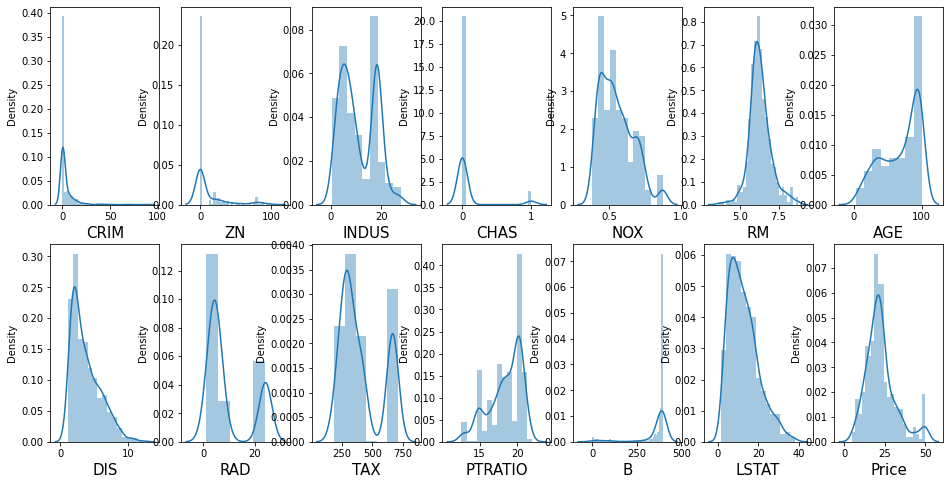

In [9]:
# let's see how data is distributed for every column
plt.figure(figsize=(16,8), facecolor='white')
plotnumber = 1

for column in XY.columns:
    if plotnumber<=14 :
        ax = plt.subplot(2,7,plotnumber)
        sns.distplot(XY[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show()

In [10]:
#Look at 'B' feature distribution
#In B column distribution in XY dataframe min value is 0.32 and 25 quantile data is 375
#Therefore here significant outliers to be removed
# we are removing the top 10% data from the B column
q=XY['B'].quantile(.1)
XY = XY[XY['B']>q]

C:\Users\ANKDIP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='B', ylabel='Density'>

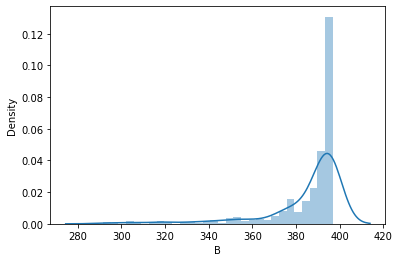

In [11]:
sns.distplot(XY['B'])

In [12]:
XY.shape

(455, 14)

In [13]:
#some of the distributions are skewed.
#Now to improve accuracy we will handle skewness.
#In some distributions there are tails. Therefore they are skewed.Let us check their skewness.
for column in XY.columns:
    print(column,XY[column].skew())

CRIM 6.749021804352551
ZN 2.05185413722001
INDUS 0.5293260870856041
CHAS 3.245382435197347
NOX 0.8876082087300805
RM 0.5464379243942573
AGE -0.46422651360513156
DIS 0.891068185267935
RAD 1.3469882886509466
TAX 0.9260974557535614
PTRATIO -0.7189532125219881
B -2.5412038366652654
LSTAT 1.0400422773403584
Price 1.1261653678172925


In [14]:
XY.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.00000,455.000000,455.000000,455.000000,455.000000,455.000000
mean,2.612045,12.637363,10.411824,0.074725,0.540984,6.315622,66.233846,3.983796,8.43956,386.881319,18.335604,384.885341,11.822176,23.498462
std,7.175451,24.267424,6.799393,0.263237,0.110351,0.702277,28.488296,2.130786,8.03271,159.247346,2.155846,19.345732,6.743506,9.079768
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.00000,187.000000,12.600000,291.550000,1.730000,5.000000
25%,0.070175,0.000000,4.930000,0.000000,0.447000,5.888500,41.300000,2.208500,4.00000,277.000000,16.950000,383.035000,6.605000,18.400000
50%,0.191860,0.000000,8.140000,0.000000,0.520000,6.219000,72.500000,3.495200,5.00000,311.000000,18.600000,392.780000,10.290000,21.900000
75%,1.348780,20.000000,18.100000,0.000000,0.609000,6.633000,92.900000,5.400900,8.00000,432.000000,20.200000,396.900000,15.270000,26.600000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.00000,711.000000,22.000000,396.900000,37.970000,50.000000


In [15]:
#Here skewness positive suggests right skewed.
#Here ZN and CHAS has min values zero.So we cann't apply log transform here.we can apply sqrt transform there.

In [16]:
XY['CHAS'].unique()

array([0., 1.])

In [17]:
#XY.quantile(0.85,axis=0)
XY['CHAS'].quantile(.92)

0.0

**CHAS consideration:** Therefore 'CHAS' column in XY dataframe has 93% of data with zero values.Also this is categorical having only o and 1.Again it is significantly skewed.We can drop this column.

In [18]:
XY.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'Price'],
      dtype='object')

In [19]:
XYt=XY.copy()

In [20]:
Xt=XY.drop(columns=['Price'])
Yt=XY['Price']

In [21]:
XYt['CRIM']=np.log(XYt['CRIM'])
XYt['ZN']=np.sqrt(XYt['ZN'])
#Xt['INDUS']=np.log(Xt['INDUS'])
XYt.drop(columns=['CHAS'],axis=1,inplace=True)
#Xt['DIS']=np.log(Xt['DIS'])
XYt['RAD']=np.log(XYt['RAD'])
XYt['B']=np.log(XYt['B'])
XYt['LSTAT']=np.log(XYt['LSTAT'])

In [22]:
XYt

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,-5.064036,4.242641,2.31,0.538,6.575,65.2,4.0900,0.000000,296.0,15.3,5.983684,1.605430,24.0
1,-3.600502,0.000000,7.07,0.469,6.421,78.9,4.9671,0.693147,242.0,17.8,5.983684,2.212660,21.6
2,-3.601235,0.000000,7.07,0.469,7.185,61.1,4.9671,0.693147,242.0,17.8,5.973377,1.393766,34.7
3,-3.430523,0.000000,2.18,0.458,6.998,45.8,6.0622,1.098612,222.0,18.7,5.977949,1.078410,33.4
4,-2.672924,0.000000,2.18,0.458,7.147,54.2,6.0622,1.098612,222.0,18.7,5.983684,1.673351,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-2.770511,0.000000,11.93,0.573,6.593,69.1,2.4786,0.000000,273.0,21.0,5.971236,2.269028,22.4
502,-3.095111,0.000000,11.93,0.573,6.120,76.7,2.2875,0.000000,273.0,21.0,5.983684,2.206074,20.6
503,-2.800824,0.000000,11.93,0.573,6.976,91.0,2.1675,0.000000,273.0,21.0,5.983684,1.729884,23.9
504,-2.211009,0.000000,11.93,0.573,6.794,89.3,2.3889,0.000000,273.0,21.0,5.974954,1.868721,22.0


C:\Users\ANKDIP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ANKDIP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ANKDIP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

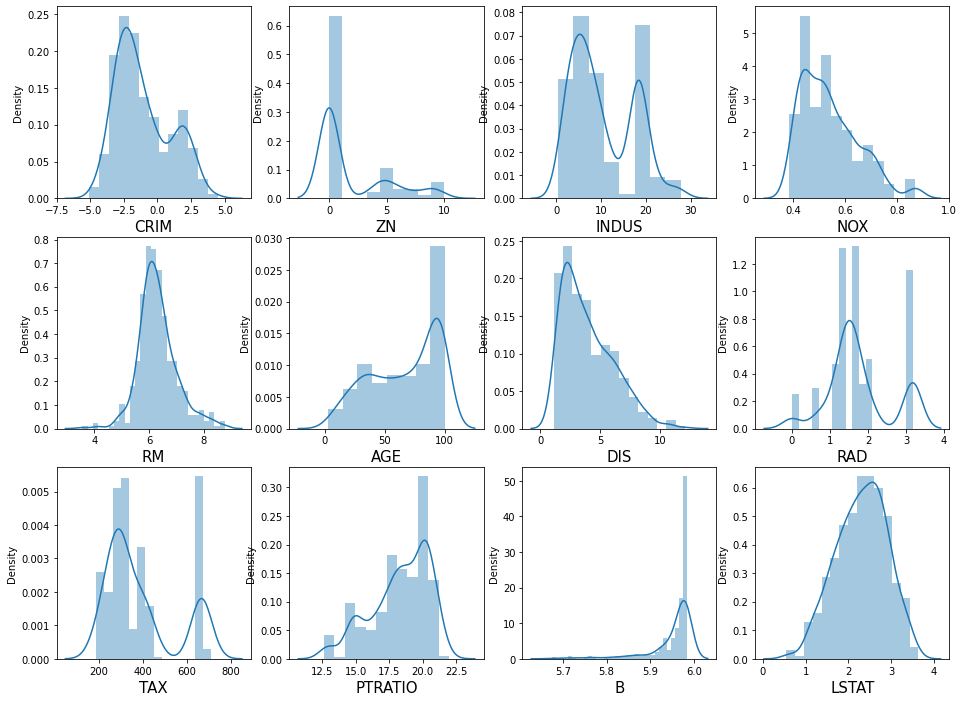

In [23]:
#Again we will check how the distribution looks like.
plt.figure(figsize=(16,12), facecolor='white')
plotnumber = 1

for column in XYt.columns:
    if plotnumber<=12:
        ax = plt.subplot(3,4,plotnumber)
        sns.distplot(XYt[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show()

In [24]:
#Here we see that feature B has a long tail.
#How much skewness of all.
for column in XYt.columns:
    print(column,XYt[column].skew())

CRIM 0.5960643120008549
ZN 1.3129475932120604
INDUS 0.5293260870856041
NOX 0.8876082087300805
RM 0.5464379243942573
AGE -0.46422651360513156
DIS 0.891068185267935
RAD 0.41374389912999476
TAX 0.9260974557535614
PTRATIO -0.7189532125219881
B -2.737005152378522
LSTAT -0.23989307043180988
Price 1.1261653678172925


In [25]:
XYt.describe()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000
mean,-1.094576,1.840988,10.411824,0.540984,6.315622,66.233846,3.983796,1.764114,386.881319,18.335604,5.951560,2.305902,23.498462
std,2.020098,3.044421,6.799393,0.110351,0.702277,28.488296,2.130786,0.830565,159.247346,2.155846,0.053988,0.590555,9.079768
min,-5.064036,0.000000,0.460000,0.385000,3.561000,2.900000,1.129600,0.000000,187.000000,12.600000,5.675212,0.548121,5.000000
25%,-2.656763,0.000000,4.930000,0.447000,5.888500,41.300000,2.208500,1.386294,277.000000,16.950000,5.948126,1.887824,18.400000
50%,-1.650989,0.000000,8.140000,0.520000,6.219000,72.500000,3.495200,1.609438,311.000000,18.600000,5.973250,2.331173,21.900000
75%,0.299191,4.472136,18.100000,0.609000,6.633000,92.900000,5.400900,2.079442,432.000000,20.200000,5.983684,2.725869,26.600000
max,4.488369,10.000000,27.740000,0.871000,8.780000,100.000000,12.126500,3.178054,711.000000,22.000000,5.983684,3.636796,50.000000


<AxesSubplot:>

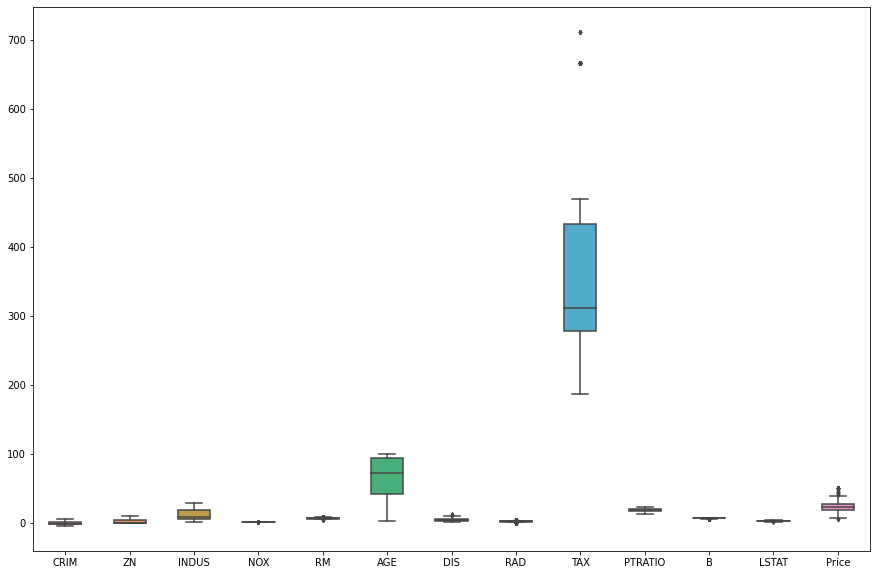

In [26]:
#still outliers present in some column.
#clearly it is significantly left skewed in B column.
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=XYt, width= 0.5,ax=ax,  fliersize=3)

C:\Users\ANKDIP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TAX', ylabel='Density'>

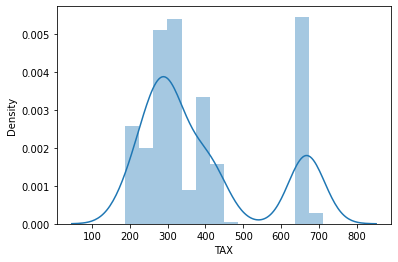

In [27]:
sns.distplot(XYt['TAX'])

In [28]:
XYt.shape

(455, 13)

In [29]:
#Excluding top 2% data of TAX
q=XYt['TAX'].quantile(.98)
XYt = XYt[XYt['TAX']<q]

In [30]:
XYt.columns

Index(['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'Price'],
      dtype='object')

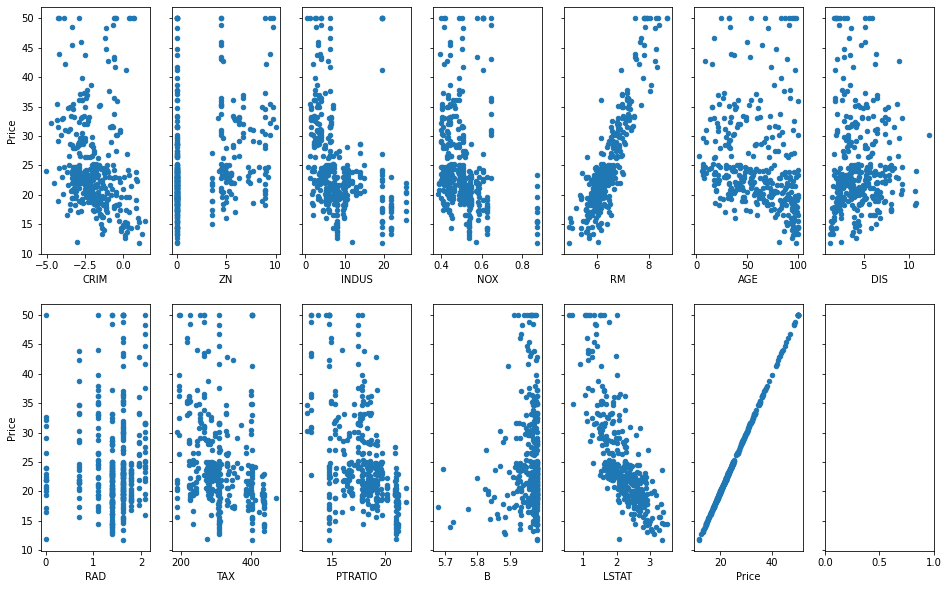

In [31]:
# visualize the relationship between the features and the response using scatterplots
fig, ax = plt.subplots(2,7,sharey=True)
i=0
for column in XYt.columns:
    XYt.plot.scatter(x=column,y='Price',ax=ax[i//7][i%7], figsize=(16, 10))
    i+=1

In [32]:
XYt

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,-5.064036,4.242641,2.31,0.538,6.575,65.2,4.0900,0.000000,296.0,15.3,5.983684,1.605430,24.0
1,-3.600502,0.000000,7.07,0.469,6.421,78.9,4.9671,0.693147,242.0,17.8,5.983684,2.212660,21.6
2,-3.601235,0.000000,7.07,0.469,7.185,61.1,4.9671,0.693147,242.0,17.8,5.973377,1.393766,34.7
3,-3.430523,0.000000,2.18,0.458,6.998,45.8,6.0622,1.098612,222.0,18.7,5.977949,1.078410,33.4
4,-2.672924,0.000000,2.18,0.458,7.147,54.2,6.0622,1.098612,222.0,18.7,5.983684,1.673351,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-2.770511,0.000000,11.93,0.573,6.593,69.1,2.4786,0.000000,273.0,21.0,5.971236,2.269028,22.4
502,-3.095111,0.000000,11.93,0.573,6.120,76.7,2.2875,0.000000,273.0,21.0,5.983684,2.206074,20.6
503,-2.800824,0.000000,11.93,0.573,6.976,91.0,2.1675,0.000000,273.0,21.0,5.983684,1.729884,23.9
504,-2.211009,0.000000,11.93,0.573,6.794,89.3,2.3889,0.000000,273.0,21.0,5.974954,1.868721,22.0


In [33]:
x=XYt.drop(columns=['Price'])
y=XYt['Price']

In [34]:
#Here dependencies looks like linear.
#scaling
scaler =StandardScaler()

X_scaled = scaler.fit_transform(x)

In [35]:
#check for multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = X_scaled

vif = pd.DataFrame()

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = x.columns

In [36]:
vif

,VIF,Features
0,2.950986,CRIM
1,2.553813,ZN
2,2.313265,INDUS
3,3.925068,NOX
4,3.281996,RM
5,2.922034,AGE
6,3.365550,DIS
7,1.340824,RAD
8,1.339249,TAX
9,1.598062,PTRATIO


In [37]:
#We do not have any vif greater than 5.So we are good to go.
#Now split our data for training and testing.

In [38]:
x_train,x_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.25,random_state=355)

In [39]:
regression = LinearRegression()

regression.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [40]:
regression.score(x_train,y_train)

0.8795024914166097

In [41]:
#what score about testing data?
regression.score(x_test,y_test)

0.8427258257619972

In [42]:
# Let's create a function to create adjusted R-Squared
def adj_r2(x,y):
    r2 = regression.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [43]:
adj_r2(x_train,y_train)

0.8738096957355047

In [44]:
adj_r2(x_test,y_test)

0.8182155648417889

In [45]:
#Saving the Model
import pickle
filename='finalized_model.pickle'
pickle.dump(regression,open(filename,'wb'))

with open('standardscaler.pickle', 'wb') as f:
    pickle.dump(scaler,f)

In [46]:
XY.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'Price'],
      dtype='object')

In [47]:
XYt.columns

Index(['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'Price'],
      dtype='object')

In [ ]:
XYt['CRIM']=np.log(XYt['CRIM'])
XYt['ZN']=np.sqrt(XYt['ZN'])
#Xt['INDUS']=np.log(Xt['INDUS'])
XYt.drop(columns=['CHAS'],axis=1,inplace=True)
#Xt['DIS']=np.log(Xt['DIS'])
XYt['RAD']=np.log(XYt['RAD'])
XYt['B']=np.log(XYt['B'])
XYt['LSTAT']=np.log(XYt['LSTAT'])

In [48]:
#prediction using the saved model
import pickle
filename='finalized_model.pickle'
loaded_model=pickle.load(open(filename,'rb'))
scaler=pickle.load(open('standardscaler.pickle','rb'))

In [49]:
data=[[np.log(.00632),np.sqrt(18.0),2.31,0.538,6.575,65.2,4.09,np.log(1.0),296.0,15.3,np.log(396.9),np.log(4.98)]]
data

[[-5.064036070823371,
  4.242640687119285,
  2.31,
  0.538,
  6.575,
  65.2,
  4.09,
  0.0,
  296.0,
  15.3,
  5.983684359789019,
  1.6054298910365616]]

In [50]:
a=loaded_model.predict(scaler.transform(data))
a

array([27.34296455])

In [ ]:
import math
2*math.factorial(3)